# Dataset World Happiness Report

El Informe Mundial sobre la Felicidad es un estudio de referencia sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El Informe Mundial sobre la Felicidad 2017, que clasifica a 155 países según sus niveles de felicidad, se presentó en las Naciones Unidas en un evento que celebraba el Día Internacional de la Felicidad el 20 de marzo. El informe sigue ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para fundamentar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo se pueden utilizar eficazmente las mediciones del bienestar para evaluar el progreso de las naciones. Los informes analizan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales en la felicidad.

In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [3]:
# !pip install kaggle

# # Sube tu archivo kaggle.json
# from google.colab import files
# files.upload()

# # Crea un directorio y mueve kaggle.json
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# # Descargar el dataset
# !kaggle datasets download -d unsdsn/world-happiness

# # Descomprimir el dataset
# !unzip world-happiness.zip

# # Leer el archivo CSV
# import pandas as pd
# df = pd.read_csv('2019.csv')

# Lectura
ruta = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/kaggle/"
df = pd.read_csv(ruta + "Mall_Customers.csv") 

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# Eliminar la columna 'CustomerID'
df = df.drop('CustomerID', axis=1)

# Imprimir las primeras 5 filas del DataFrame (sin la columna eliminada)
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


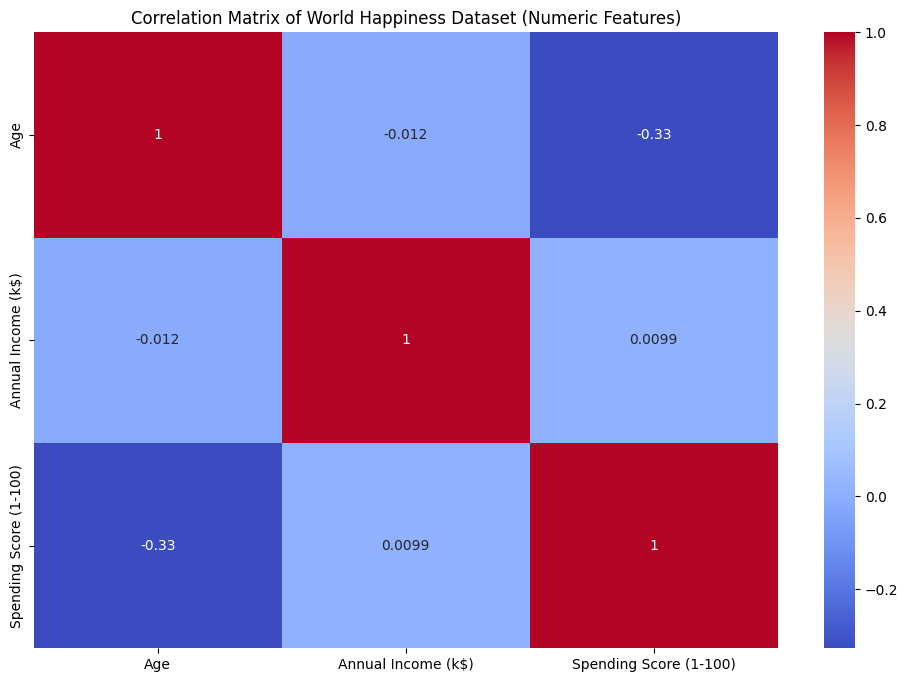

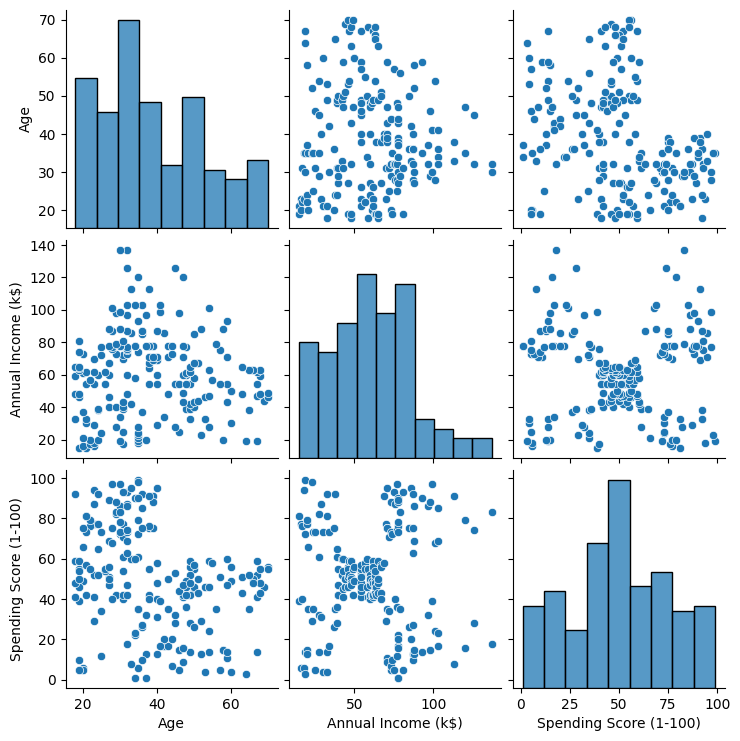

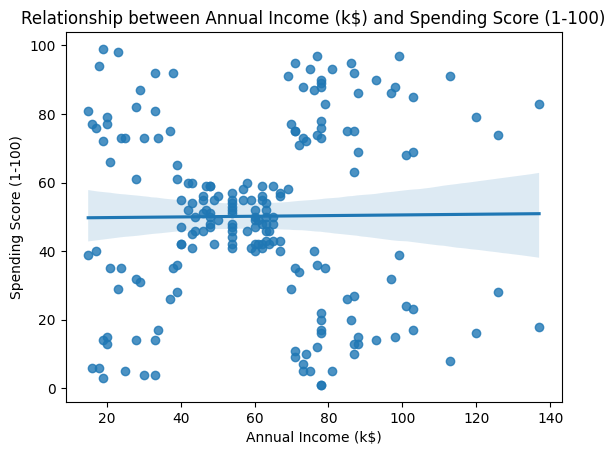

In [7]:
# Seleccionar sólo columnas numéricas para el análisis de correlación
numeric_df = df.select_dtypes(include=np.number)

# Estadísticas descriptivas para características numéricas
print(numeric_df.describe())

# Matriz de correlación para características numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of World Happiness Dataset (Numeric Features)')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.show()

# Análisis de regresión (ejemplo: relación entre el PIB y el índice de felicidad)
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)  # Usando df original para contexto
plt.title('Relationship between Annual Income (k$) and Spending Score (1-100)')
plt.show()

               Age  Annual Income (k$)  Spending Score (1-100)  cluster
cluster                                                                
0        25.838235           42.750000               53.647059      0.0
1        32.853659           87.341463               79.975610      1.0
2        51.274725           61.802198               34.208791      2.0


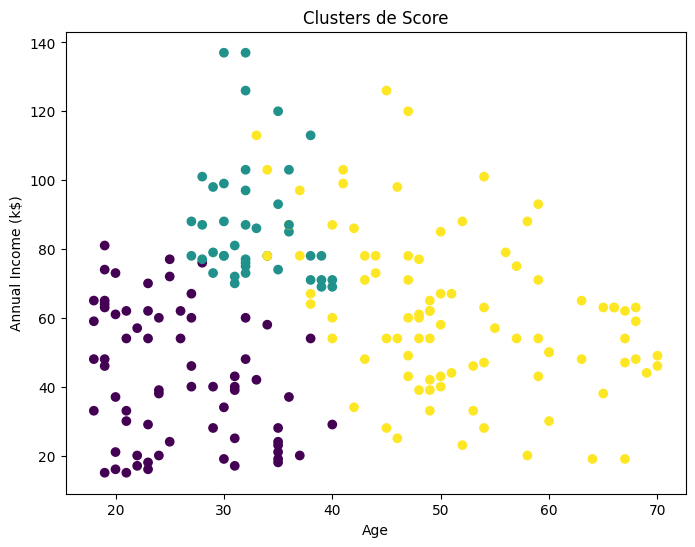

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para el clustering
X = df[['Age', 'Annual Income (k$)',  'Spending Score (1-100)']]

# Escalar los datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir el número de clusters (puedes ajustar este valor)
n_clusters = 3   #Técnica de codo, método de la  silueta.

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Asignar las etiquetas de cluster a los datos
datosorginal=df
df['cluster'] = kmeans.labels_

# Calculate the mean for only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby('cluster')[numeric_cols].mean()  # Select numeric columns for mean calculation

# Mostrar los resultados
print(cluster_means)

# Visualizar los clusters (ejemplo con dos variables)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters de Score')
plt.show()


Análisis del Cluster 0:

Estadísticas Descriptivas:
             Age  Annual Income (k$)  Spending Score (1-100)  cluster
count  68.000000           68.000000               68.000000     68.0
mean   25.838235           42.750000               53.647059      0.0
std     6.092840           19.416392               23.277537      0.0
min    18.000000           15.000000                5.000000      0.0
25%    20.750000           24.000000               41.000000      0.0
50%    24.000000           40.000000               54.000000      0.0
75%    31.000000           60.000000               73.000000      0.0
max    40.000000           81.000000               99.000000      0.0

Distribución de Variables Clave:

Variable: Age
count    68.000000
mean     25.838235
std       6.092840
min      18.000000
25%      20.750000
50%      24.000000
75%      31.000000
max      40.000000
Name: Age, dtype: float64


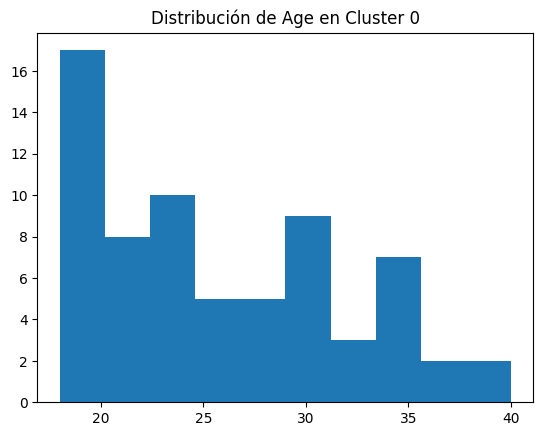


Variable: Annual Income (k$)
count    68.000000
mean     42.750000
std      19.416392
min      15.000000
25%      24.000000
50%      40.000000
75%      60.000000
max      81.000000
Name: Annual Income (k$), dtype: float64


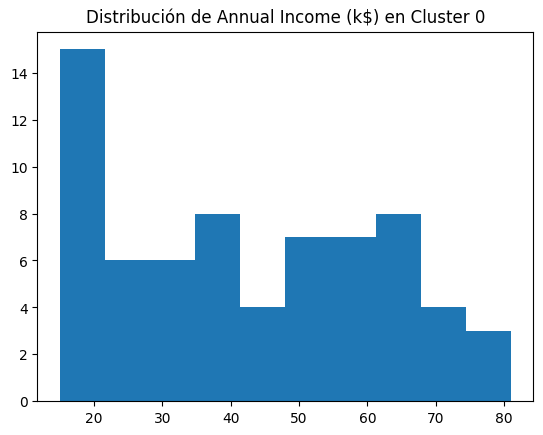


Análisis del Cluster 1:

Estadísticas Descriptivas:
             Age  Annual Income (k$)  Spending Score (1-100)  cluster
count  41.000000           41.000000               41.000000     41.0
mean   32.853659           87.341463               79.975610      1.0
std     3.811568           17.985563               13.997299      0.0
min    27.000000           69.000000               18.000000      1.0
25%    30.000000           75.000000               74.000000      1.0
50%    32.000000           79.000000               83.000000      1.0
75%    36.000000           97.000000               90.000000      1.0
max    40.000000          137.000000               97.000000      1.0

Distribución de Variables Clave:

Variable: Age
count    41.000000
mean     32.853659
std       3.811568
min      27.000000
25%      30.000000
50%      32.000000
75%      36.000000
max      40.000000
Name: Age, dtype: float64


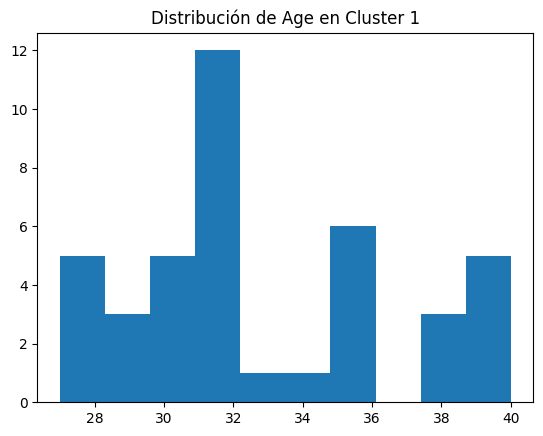


Variable: Annual Income (k$)
count     41.000000
mean      87.341463
std       17.985563
min       69.000000
25%       75.000000
50%       79.000000
75%       97.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


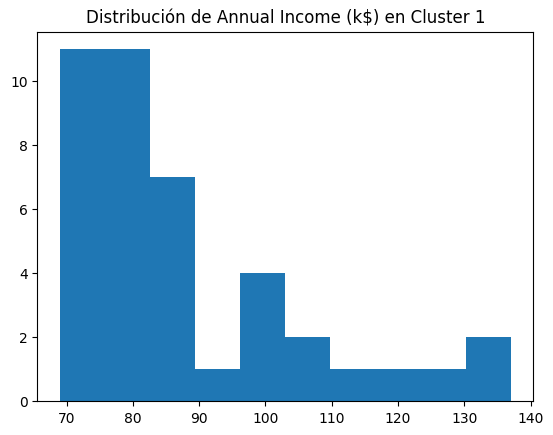


Análisis del Cluster 2:

Estadísticas Descriptivas:
             Age  Annual Income (k$)  Spending Score (1-100)  cluster
count  91.000000           91.000000               91.000000     91.0
mean   51.274725           61.802198               34.208791      2.0
std     9.847804           23.084973               17.680822      0.0
min    33.000000           19.000000                1.000000      2.0
25%    45.000000           46.500000               16.500000      2.0
50%    49.000000           60.000000               40.000000      2.0
75%    59.000000           78.000000               48.500000      2.0
max    70.000000          126.000000               60.000000      2.0

Distribución de Variables Clave:

Variable: Age
count    91.000000
mean     51.274725
std       9.847804
min      33.000000
25%      45.000000
50%      49.000000
75%      59.000000
max      70.000000
Name: Age, dtype: float64


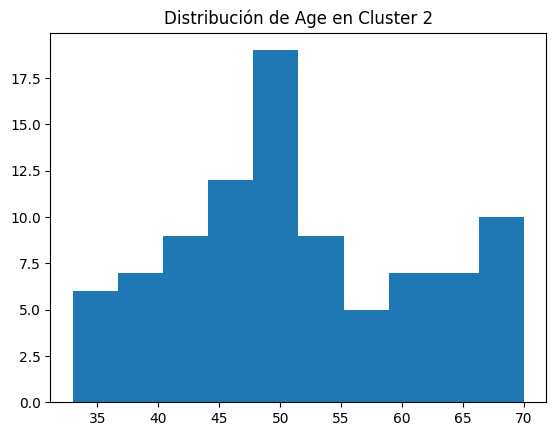


Variable: Annual Income (k$)
count     91.000000
mean      61.802198
std       23.084973
min       19.000000
25%       46.500000
50%       60.000000
75%       78.000000
max      126.000000
Name: Annual Income (k$), dtype: float64


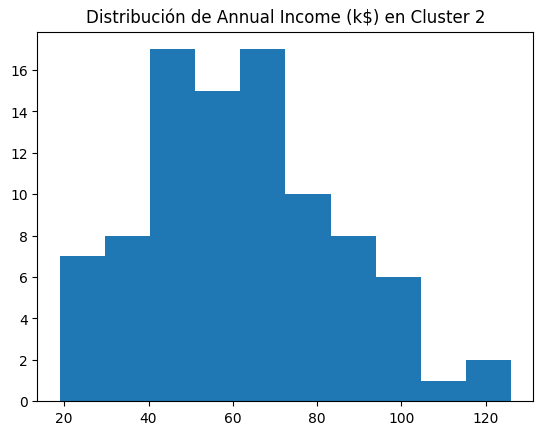

In [12]:
# Analizar cada cluster por separado
for cluster_num in range(n_clusters):
  print(f"\nAnálisis del Cluster {cluster_num}:")
  cluster_data = df[df['cluster'] == cluster_num]

  # Estadísticas descriptivas para variables numéricas
  print("\nEstadísticas Descriptivas:")
  print(cluster_data.describe())

  # Distribución de variables clave (ejemplo: GDP per capita, Social support)
  print("\nDistribución de Variables Clave:")
  for col in ['Age', 'Annual Income (k$)']:
    print(f"\nVariable: {col}")
    print(cluster_data[col].describe())
    # Puedes agregar un histograma para visualizar la distribución
    plt.hist(cluster_data[col], bins=10)
    plt.title(f"Distribución de {col} en Cluster {cluster_num}")
    plt.show()

  # # Analizar la distribución de países en cada cluster
  # print("\nPaíses en el Cluster:")
  # print(cluster_data['Country or region'].value_counts())

##Análisis de componentes principales
El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [13]:
# Gráficos
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [14]:
# Entrenamiento modelo PCA con escalado de los datos
# Select only numeric features for PCA
numeric_features = df.select_dtypes(include=np.number).columns
X_numeric = df[numeric_features]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_numeric)  # Fit on numeric data only

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [15]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
num_pcs = modelo_pca.n_components_ # Get the actual number of components
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_numeric.columns, # Use columns for numeric data only
    index   = [f'PC{i+1}' for i in range(num_pcs)] # Dynamically create index
)

,Age,Annual Income (k$),Spending Score (1-100),cluster
PC1,-0.617011,-0.161920,0.409973,-0.651921
PC2,-0.168833,0.922216,0.321479,0.132906
PC3,-0.409230,0.252167,-0.851223,-0.210624
PC4,0.650633,0.244359,-0.063187,-0.716221


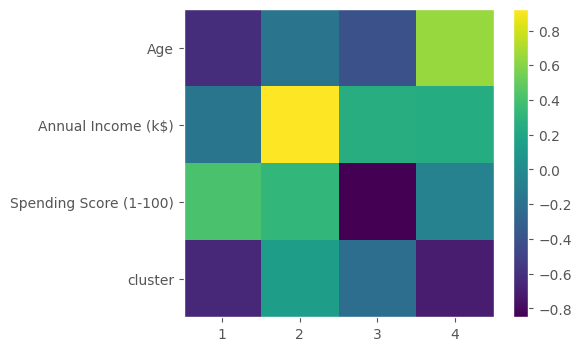

In [16]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_numeric.columns)), X_numeric.columns) # Use numeric columns
plt.xticks(range(modelo_pca.n_components_), np.arange(modelo_pca.n_components_) + 1) # Match ticks and labels
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.51959878 0.2617278  0.18699253 0.03168089]


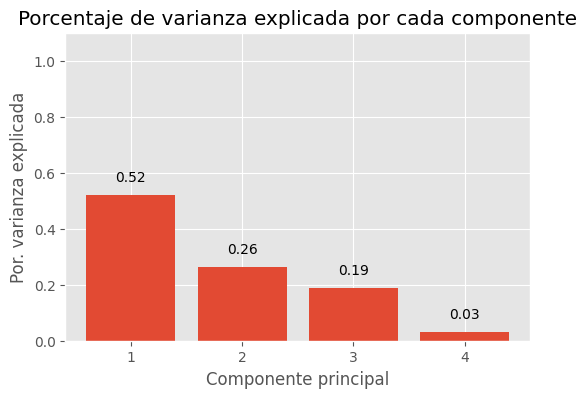

In [17]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.51959878 0.78132658 0.96831911 1.        ]


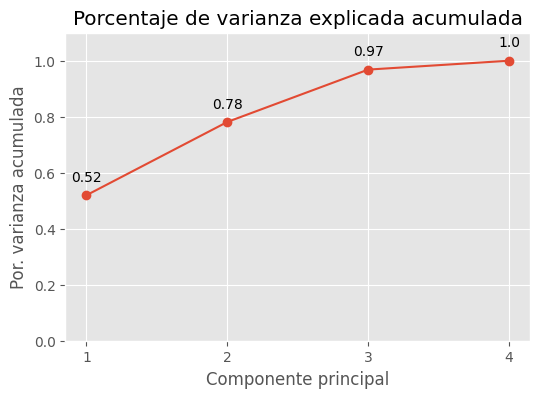

In [18]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1, # Changed to match number of components
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum): # Changed loop range
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Modelo

In [19]:
# Gráficos
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing


In [20]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
3,Age,cluster,0.817945,0.817945
12,cluster,Age,0.817945,0.817945
11,Spending Score (1-100),cluster,-0.370925,0.370925
14,cluster,Spending Score (1-100),-0.370925,0.370925
2,Age,Spending Score (1-100),-0.327227,0.327227


In [22]:
# División de los datos en train y test
X = df.drop(columns='Spending Score (1-100)')
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [23]:
# División de los datos en train y test
# Select only numerical features for the model
numerical_features = df.select_dtypes(include=['float64', 'int']).columns
X = df[numerical_features].drop(columns='Spending Score (1-100)')
y = df['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [24]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 25.37903726002453



## Con PCA

In [26]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [27]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [28]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 25.37903726002453


In [29]:
# Grid de hiperparámetros evaluados
param_grid = {'pca__n_components': [1, 2, 4, 5, 6]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, shuffle=True, random_state=123), # Added shuffle=True
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1,-23.548761,2.118581,-23.433270,0.543823
1,2,-23.735402,2.282033,-23.274545,0.560736
2,4,NaN,NaN,NaN,NaN


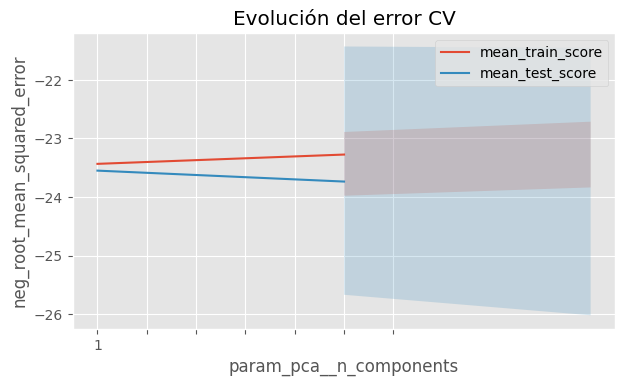

In [30]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [31]:
# Mejores hiperparámetros por validación cruzada
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 1} : -23.548761088641925 neg_root_mean_squared_error


Los resultados de validación cruzada muestran que, el mejor modelo, se obtiene empleando las 4 primeras componentes. Sin embargo, teniendo en cuenta la evolución del error y su intervalo, a partir de la 2 componente no se consiguen mejoras significativas.

In [32]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

In [ ]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.48090387729390593


Fuente:

*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://www.kaggle.com/



